<html>
<body>
    <div class="image-container" style="display: flex;">
        <img src="https://ufal.br/ufal/resolveuid/5ba5577fc45f41f48a6e8e9311488b28" alt="Image 1" style="width: 15%; height: auto;">
        <img src="https://ic.ufal.br/site-logo" alt="Image 2" style="width: 15%; height: auto;">
    </div>
   <h1 align="center"> Redes Neurais e Aprendizado Profundo - 2023.1 </h1>
   <h2 align="center"> Professor: Tiago Figueiredo Vieira </h2>
</body>
</html>

---

# Estimativa da máxima verossimilhança

Implemente o algoritmo da estimativa da máxima verossimilhança para encontrar os parâmetros da distribuição que melhor descreve a função densidade de probabilidade que deu origem aos dados disponíveis na base de dados em anexo ```x_train.npy``` usando o Tensorflow.

Utilizar os nomes **mean** e **sigma** para as variáveis de **média** e **desvio padrão** respectivamente.

**Gere a resposta final como um array do numpy(np.array()) não como uma lista.**

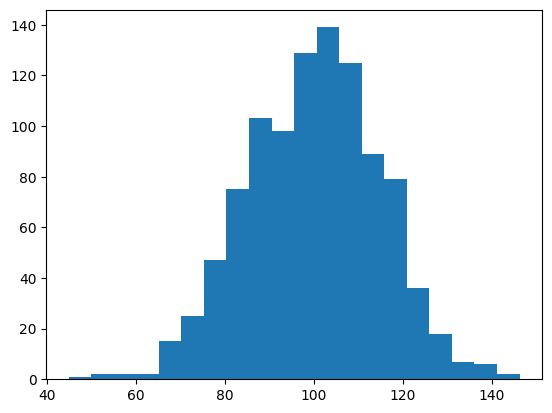

In [1]:
# Visualizando o histograma para identificar a distribuição

import numpy as np
import matplotlib.pyplot as plt

x_train = np.load('x_train.npy')
num_bins = 20
plt.hist(x_train, 20)
plt.show()

In [2]:
# YOUR CODE HERE
import numpy as np
import tensorflow as tf

x_train = np.load('x_train.npy')

mean = tf.Variable(0.0, name='mean')
sigma = tf.Variable(1.0, name='sigma')

def logmle(x):
    return tf.reduce_sum(-0.5*tf.math.log(2*np.pi*tf.square(sigma))- 0.5*tf.square(x-mean)/tf.square(sigma))

optimizer = tf.optimizers.Adam(learning_rate=0.1)

for x in range(1000):
    with tf.GradientTape() as tape:
        result = -logmle(x_train)
    gradients = tape.gradient(result, [mean, sigma])
    optimizer.apply_gradients(zip(gradients, [mean, sigma]))

array = np.array([mean.numpy(),sigma.numpy()])
print(array)

2023-08-02 21:14:11.007818: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-02 21:14:11.029883: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-02 21:14:11.030380: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 21:14:11.543741: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[25.745096  8.092818]


In [3]:
# Testes ocultos